<a href="https://colab.research.google.com/github/reitezuz/18NES1-2026/blob/main/week01/perceptron0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Perceptron

### Task: Implement a Simple Perceptron

Complete the implementation of the `Perceptron` class.

Implement the following methods:

- **`internal_potential(inputs)`**  
  Compute the internal potential  
  $$
  u = \sum_i w_i x_i + b
  $$
  (or an equivalent formulation from the lecture).

- **`activation(u)`**  
  Implement a **step (threshold) activation function**.

  Choose one of the step-function definitions presented in the lecture slides  
  (i.e., a version with two or three output values).

  Use your chosen definition consistently and implement both output variants:
  - **Binary mode** (`binary=True`): output in {0, 1} or {0, 0.5, 1}
  - **Bipolar mode** (`binary=False`): output in {-1, +1} or {-1, 0, 1}

- **`forward(inputs)`**  
  Compute the final neuron output by combining the internal potential and activation function.

---

### Notes

- Clearly follow one consistent convention (e.g., decide whether the positive class corresponds to $u \ge 0$ or $u > 0$).
- First implement the solution using standard Python (e.g., a loop).
- Then try a more efficient implementation using **NumPy** (e.g., dot product).
- Use the code in the next two cells to verify your implementation and to visualize the decision boundary.
- After implementation, experiment by changing only the **bias** or one **weight** and observe how the decision boundary changes.


In [2]:
import numpy as np

class Perceptron:
    def __init__(self, weights, bias, binary=True) -> None:
        ...

    def internal_potential(self, inputs) -> float:
        ...

    def activation(self, xi) -> int:
        ...

    def forward(self, inputs) -> int:
        ...

Run the following code to see how the perceptron processes an input:

- try different weight vectors, input vectors or biases and switch between binary and bipolar activation

In [13]:
weights = [ 1, 1]
bias = -1
inputs = [-1, -1]
binary = False

p = Perceptron(weights, bias, binary)

internal_potential = p.internal_potential(inputs)
print(internal_potential)

output = p.forward(inputs)
print(output)

None
None


Vizualize the decision boundary of the perceptron:
- The visualization of the decision boundary works only for a neuron with **two inputs**.

Perceptron with weights [1, 1] and bias -1


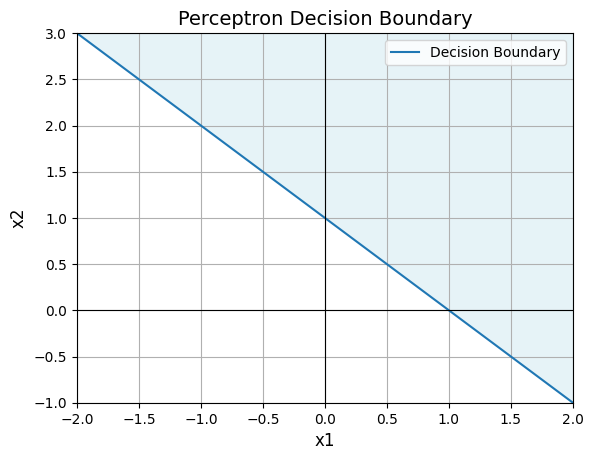

In [21]:
# weights = [1, 1]
# bias = -1

print ("Perceptron with weights", weights, "and bias", bias)

import matplotlib.pyplot as plt
# Generate points for visualization
x = np.linspace(-2, 2, 100)
y = -(weights[0] * x + bias) / weights[1]

# Plot the decision boundary
plt.plot(x, y, label='Decision Boundary')

plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.title('Perceptron Decision Boundary', fontsize=14)
plt.grid(True)
plt.legend()

#Highlight x and y axes
plt.axhline(0, color='black', linewidth=0.8)  # x-axis
plt.axvline(0, color='black', linewidth=0.8) # y-axis


# Shade positive region (where perceptron output > 0)
# Create grid
xx, yy = np.meshgrid(np.linspace(-2, 2, 400),
                     np.linspace(y.min(), y.max(), 400))
Z = weights[0]*xx + weights[1]*yy + bias
plt.contourf(xx, yy, Z > 0,
             levels=[0.5, 1],
             colors=['lightblue'],
             alpha=0.3)

plt.show()
